In [1]:
import numpy as np
import sys, os
sys.path.append('../../shared/utilsGRF/')
from IPython.display import display
import networkx as nx
import subprocess, glob, re
import matplotlib.pyplot as plt

In [8]:
edges=[(1,'a1',2),(2,'a2',3),(3,'a3',1),
       (4,'alpha1',5),(5,'alpha2',6),(6,'alpha3',4),
      (1,'kb1-x',4),(4,'ku1',1),(2,'kb2-x',5),(5,'ku2',2),(3,'kb3-x',6),(6,'ku3',3)]
nnodes=6
MTTfolder='../../shared/utilsGRF' #folder with MTT.py 
basename='graph'

parlist=[x[1] for x in edges]
parlist=list(set(parlist))


for pnum,par in enumerate(parlist):
    if '-x' in par:
        parlist[pnum]=parlist[pnum].replace('-x','')
print(parlist)

graphname=os.path.join(MTTfolder,basename+'.txt')
outf=open(graphname,'w')
for x in edges:
    x_str=list(map(str,x))
    outf.write('('+','.join(x_str)+') ')
outf.close()

#execute_MTT(self):

args=["python",os.path.join(MTTfolder,'MTT.py'),graphname]
print("executing MTT")
print(subprocess.check_call(args))


#parse_rhos_from_graphfiles(self):
#this was previously called rhos_from_edges
edges=np.array(edges)
print(edges)
#find files that correspond to the spanning trees
files=glob.glob(os.path.join(MTTfolder,basename+'*'))
pat=re.compile('[0-9]+.txt')
n=0
for f in files:
    if pat.findall(f):
        n+=1
all_rhos=[] 
allGraphs=dict()
allterms=dict()
for i in range(1,n+1):
    fname=os.path.join(MTTfolder,basename+'-%d.txt'%i)

    fi=open(fname,'r')
    rho_expr='rho_%d='%i
    allGraphs[i]=[]
    allterms[i]=[]
    for lnum,l in enumerate(fi.readlines()):
        print("line is", l)
        print("len(l)", len(l))
        idxs=np.array(list(map(int,l.strip().split())),dtype=bool)
        #print(idxs)
        subset=edges[idxs]
        expr=[x[1] for x in subset] #labels that multiply together in a term of the rho
        term='*'.join(expr)
        if lnum<1:
            rho_expr=rho_expr+term
        else:
            rho_expr=rho_expr+'+'+term
        allterms[i].append(term)
        #now get Graph
        G=nx.DiGraph()
        for edge in subset:
            n0=int(edge[0])
            n1=int(edge[2])
            par=edge[1]
            G.add_edge(n0,n1,name=par)
            G.add_edge
        allGraphs[i].append(G)
        
            
        

    all_rhos.append(rho_expr)

['a2', 'ku1', 'ku2', 'alpha1', 'ku3', 'a3', 'kb1', 'alpha3', 'kb2', 'kb3', 'alpha2', 'a1']
executing MTT
0
[['1' 'a1' '2']
 ['2' 'a2' '3']
 ['3' 'a3' '1']
 ['4' 'alpha1' '5']
 ['5' 'alpha2' '6']
 ['6' 'alpha3' '4']
 ['1' 'kb1-x' '4']
 ['4' 'ku1' '1']
 ['2' 'kb2-x' '5']
 ['5' 'ku2' '2']
 ['3' 'kb3-x' '6']
 ['6' 'ku3' '3']]
line is 0	1	1	1	0	1	0	0	0	1	0	0

len(l) 24
line is 0	1	1	1	0	0	0	0	0	1	0	1

len(l) 24
line is 0	1	1	1	1	0	0	0	0	0	0	1

len(l) 24
line is 0	0	1	1	1	0	0	0	1	0	0	1

len(l) 24
line is 0	1	1	0	0	0	0	1	0	1	0	1

len(l) 24
line is 0	1	1	0	1	0	0	1	0	0	0	1

len(l) 24
line is 0	0	1	0	1	0	0	1	1	0	0	1

len(l) 24
line is 0	1	1	0	0	1	0	1	0	1	0	0

len(l) 24
line is 0	1	1	0	1	1	0	1	0	0	0	0

len(l) 24
line is 0	0	1	0	1	1	0	1	1	0	0	0

len(l) 24
line is 0	0	0	0	1	1	0	1	1	0	1	0

len(l) 24
line is 0	1	0	0	1	1	0	1	0	0	1	0

len(l) 24
line is 0	1	0	0	0	1	0	1	0	1	1	0

len(l) 24
line is 1	0	1	1	1	0	0	0	0	0	0	1

len(l) 24
line is 1	0	1	0	1	0	0	1	0	0	0	1

len(l) 24
line is 1	0	1	0	1	1	0	1	0	0	0	0

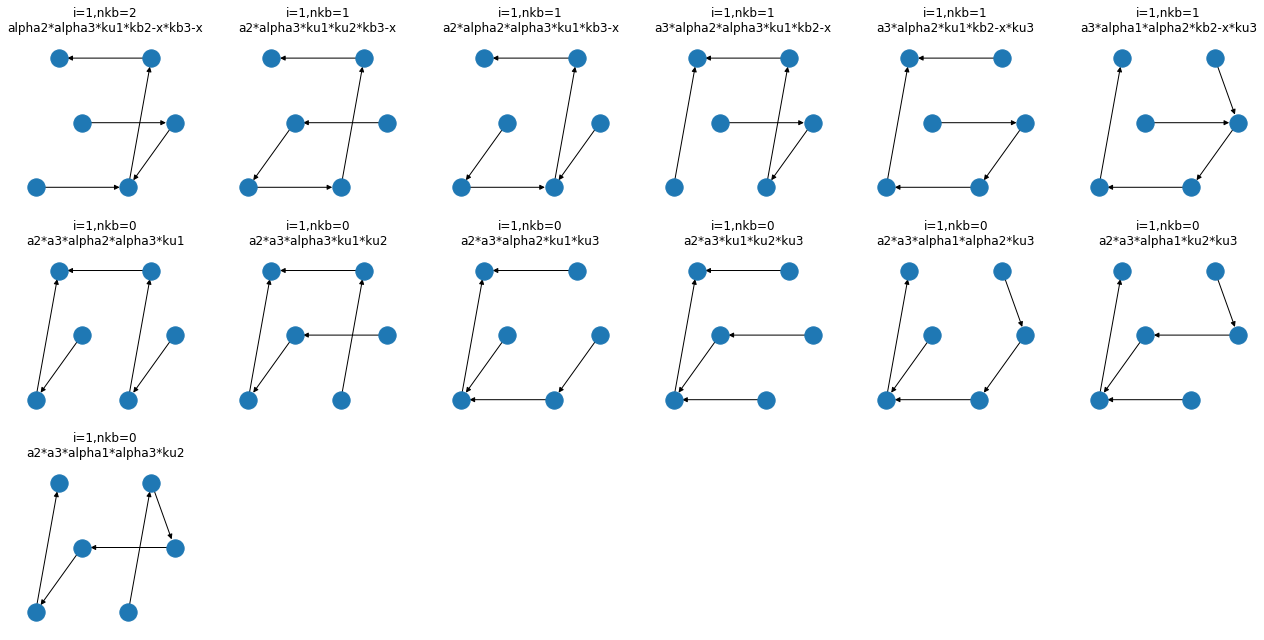

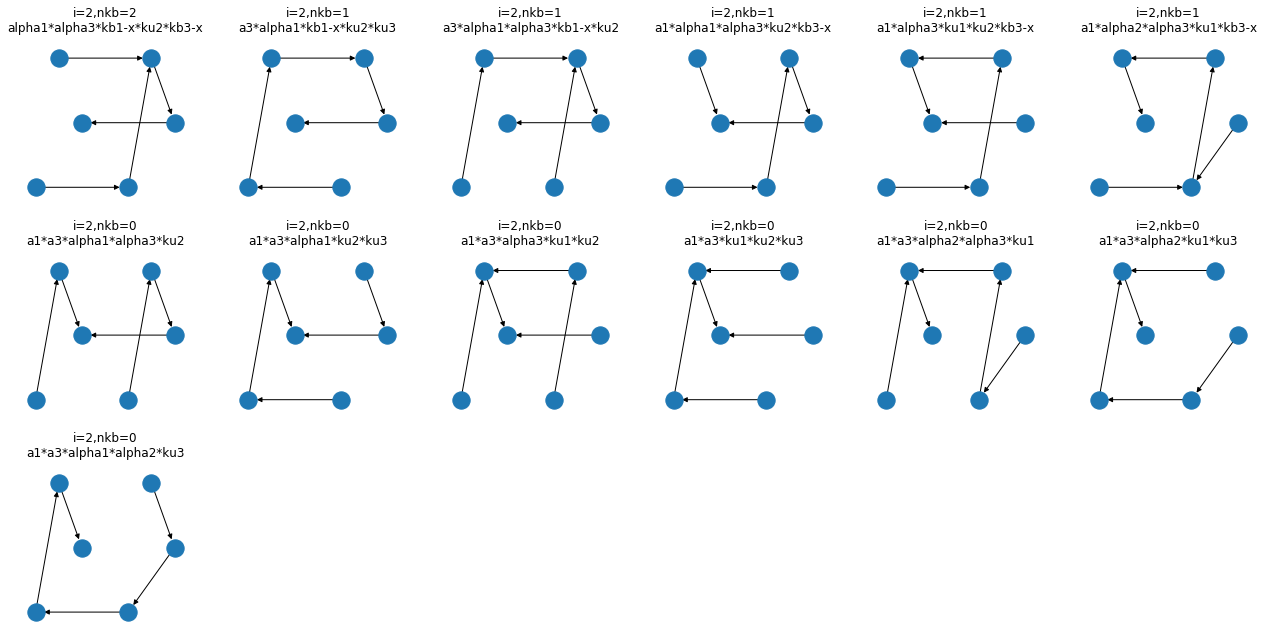

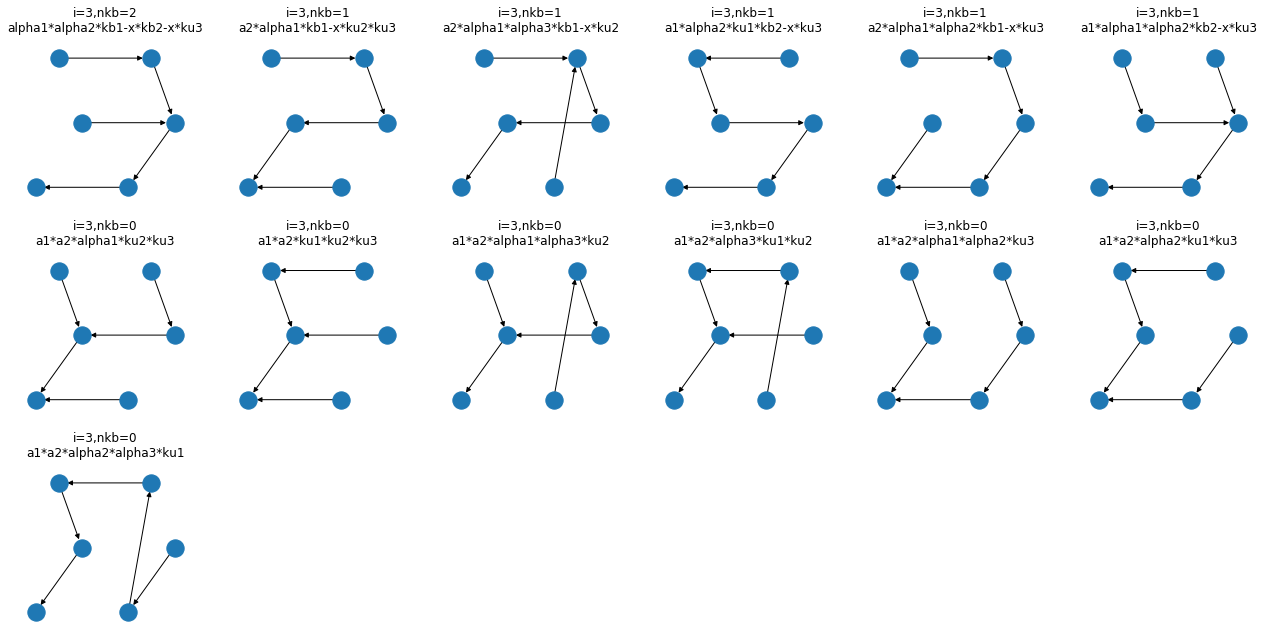

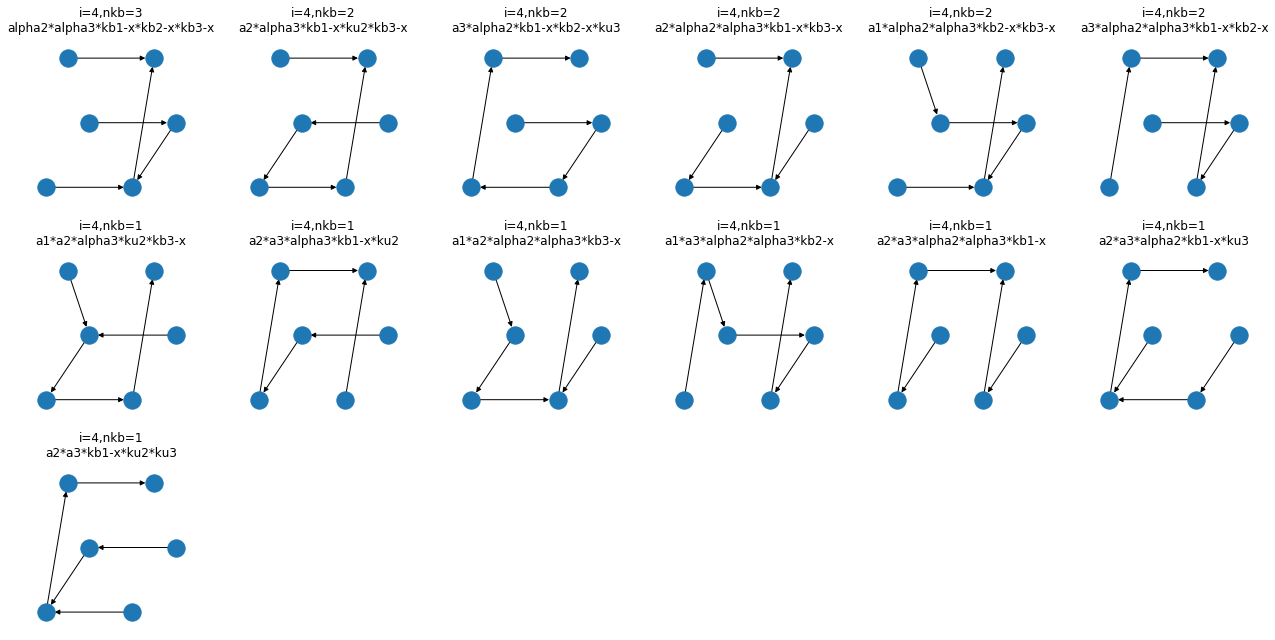

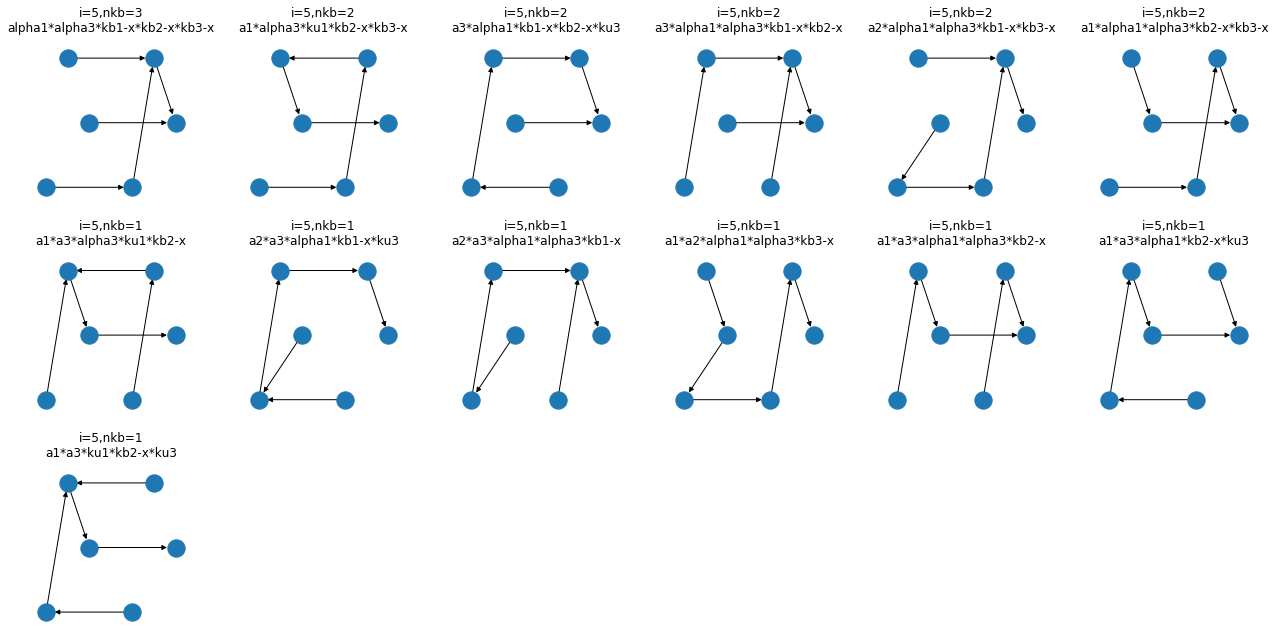

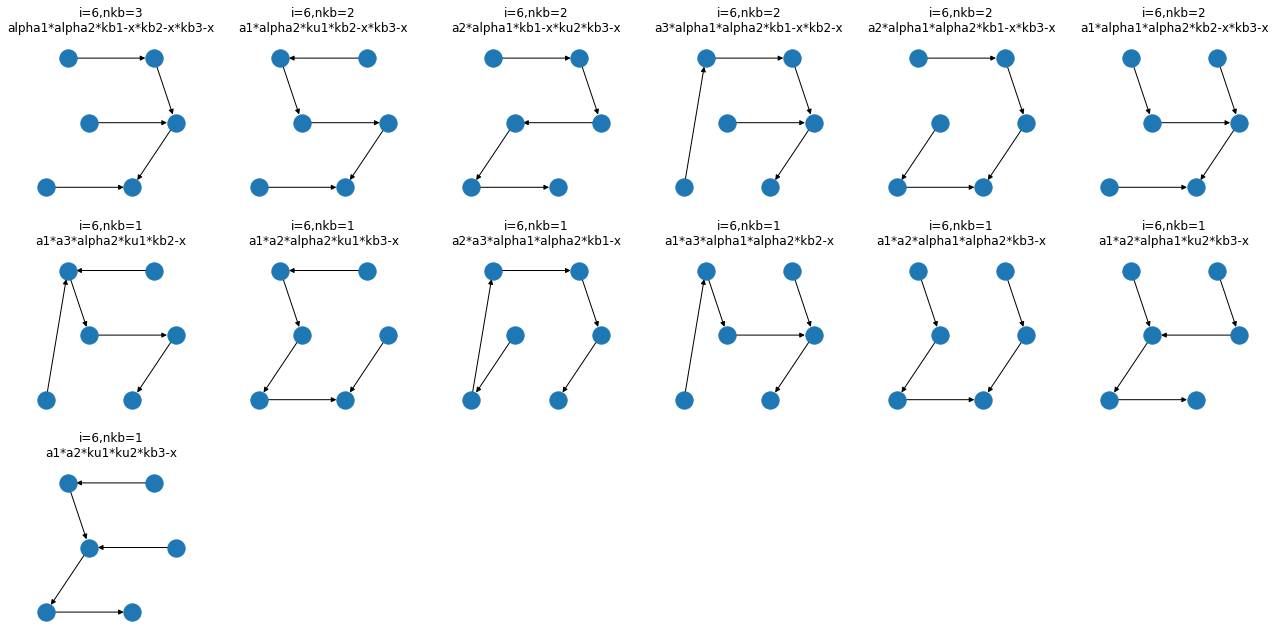

In [9]:
dx=2
coords={1:(1,0.6),2:(1.5,0.3),3:(0.5,0),4:(1+dx,0.6),5:(1.5+dx,0.3),6:(0.5+dx,0)}
bindings=[(1,4),(2,5),(3,6)]
nkbsdict=dict()
plotbynode=True
for i in range(1,nnodes+1):
    Gs=allGraphs[i]
    ngs=len(Gs)
    ncol=6
    nrow=np.ceil(ngs/ncol)
    
    nkbs=[]
    #sort Gs according to how many kb edges they have
    for gn,G in enumerate(Gs):
        nkb=0
        for edge in G.edges:
            if edge in bindings:
                nkb+=1
        nkbs.append(nkb)
    
    nkbsdict[i]=nkbs
    
    argsort=np.argsort(nkbs)
    if plotbynode:
        fig=plt.figure(figsize=(3*ncol,3*nrow))
        for gidx,gn in enumerate(argsort[::-1]):
            G=Gs[gn]
            ax=fig.add_subplot(nrow,ncol,gidx+1)
            nx.draw(G,pos=coords)
            term=allterms[i][gn]
            ax.set_title("i=%d,nkb=%d\n%s"%(i,nkbs[gn],term))
        plt.tight_layout()
        plt.show()
    

3


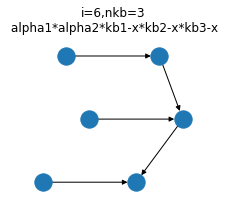

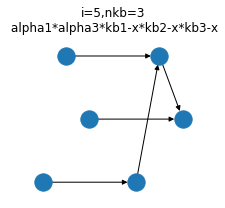

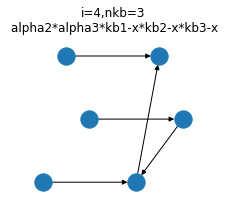

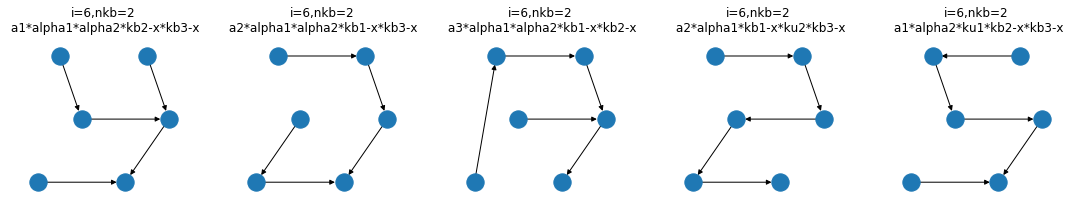

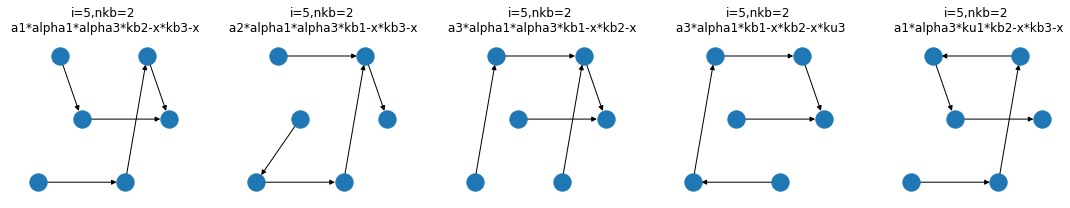

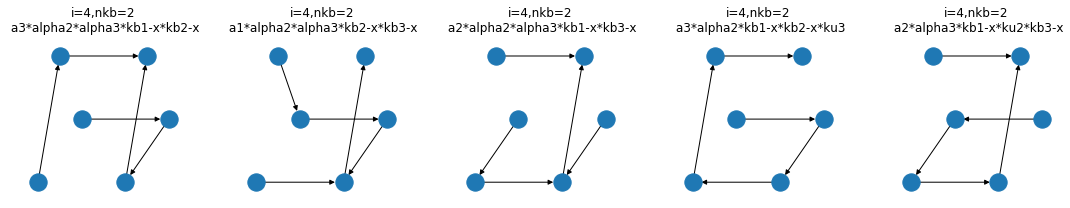

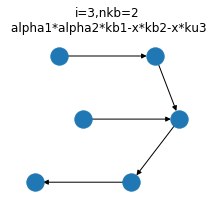

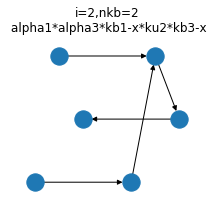

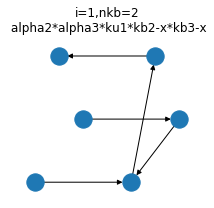

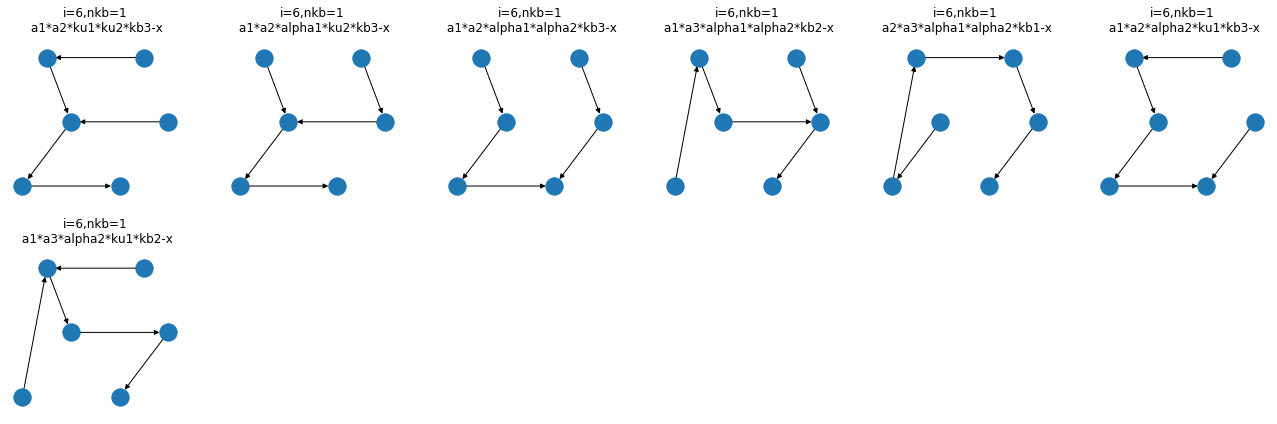

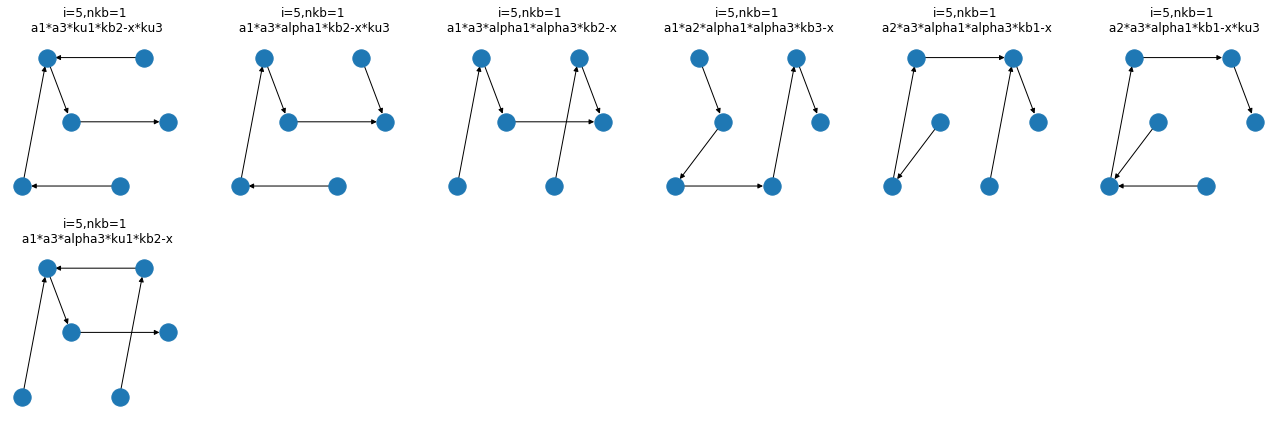

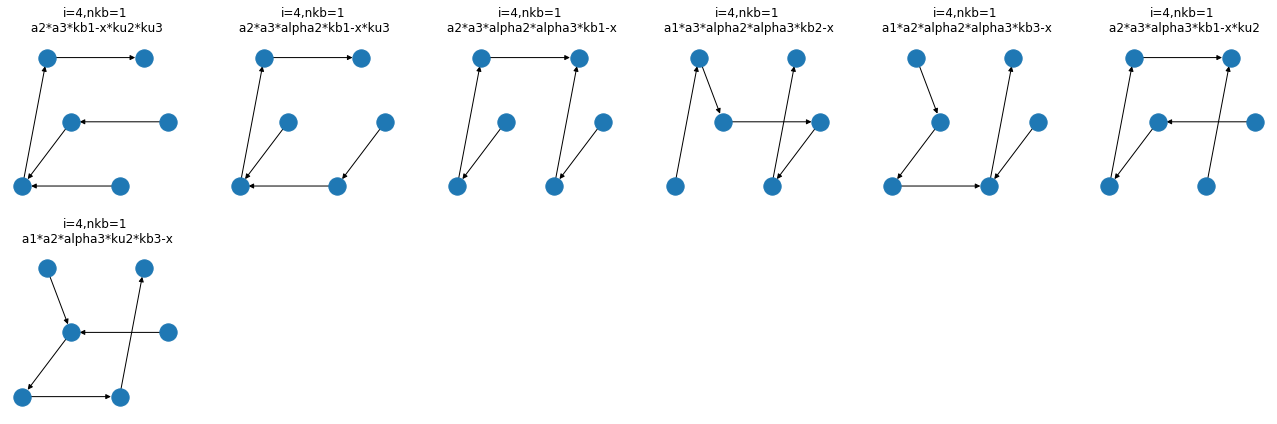

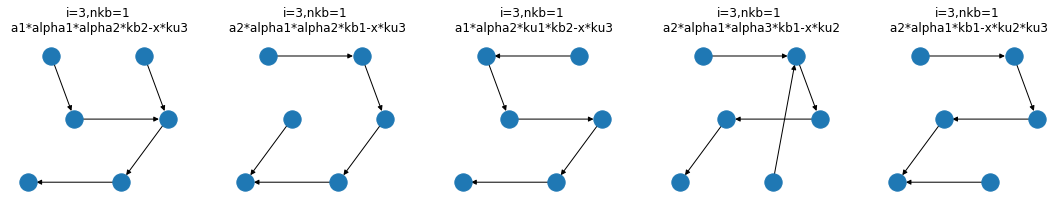

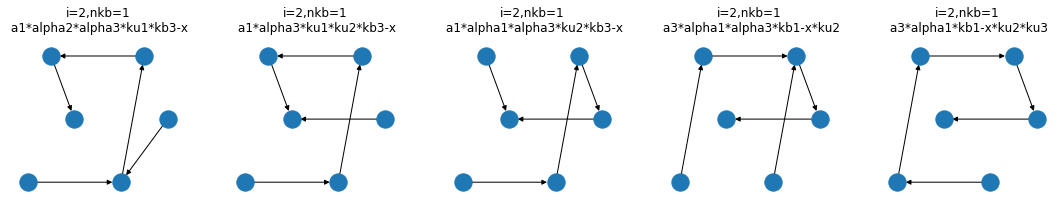

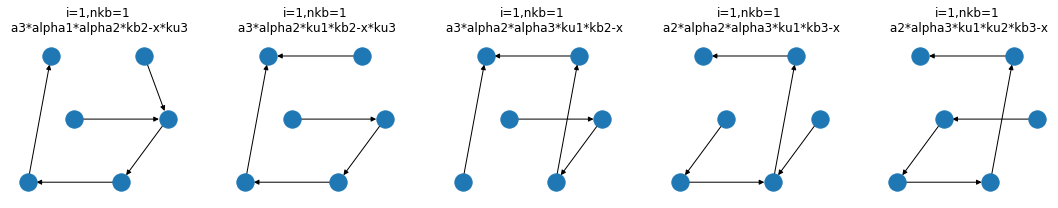

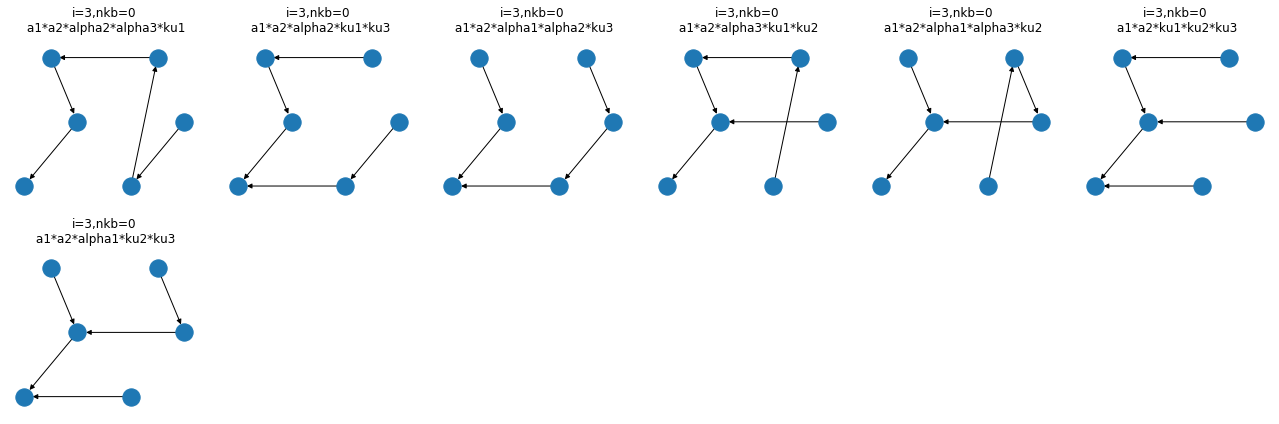

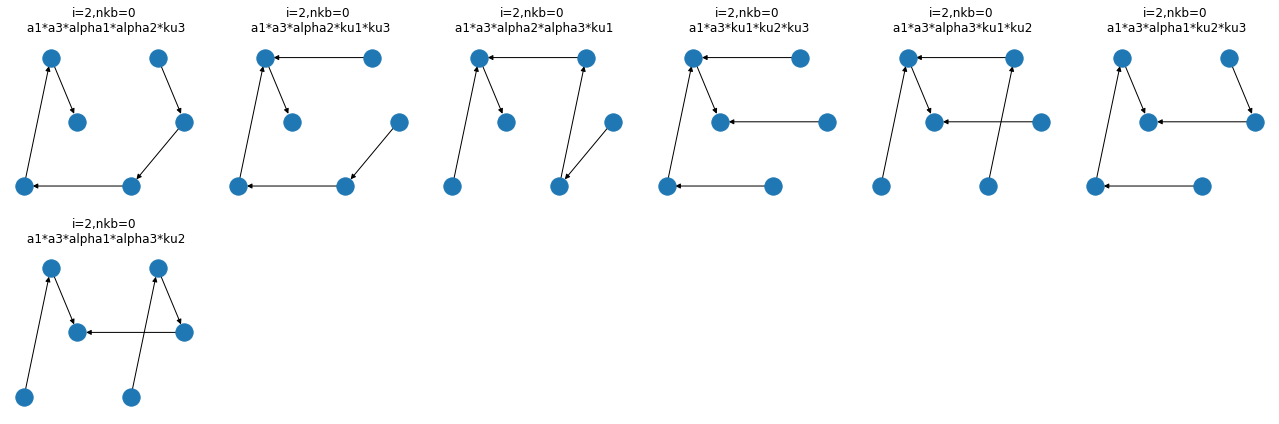

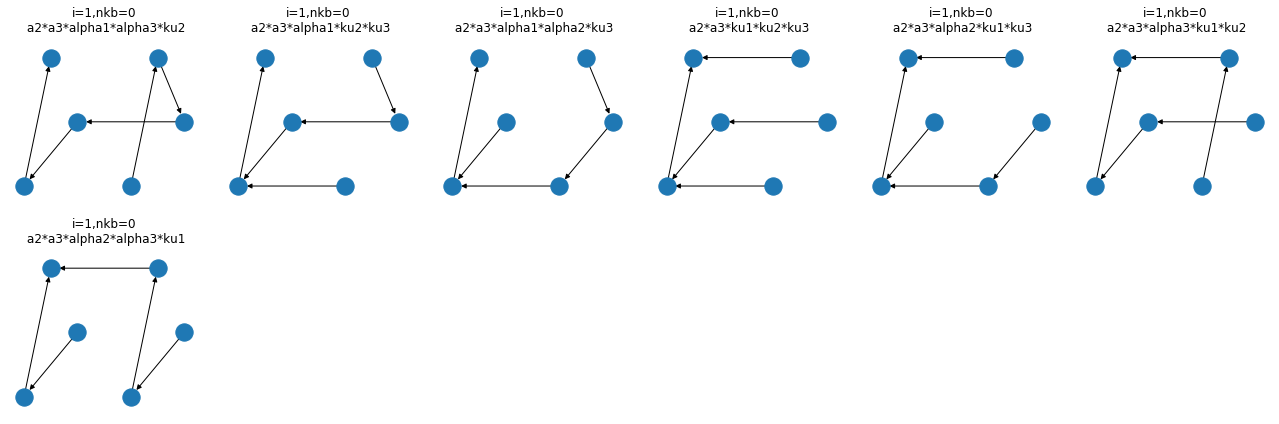

In [19]:
maxnkbs=0
for node in nkbsdict.keys():
    max_=max(nkbsdict[node])
    if max_>maxnkbs:
        maxnkbs=max_
print(maxnkbs)
for nkb in np.arange(0,maxnkbs+1)[::-1]:
    
    for node in np.arange(1,nnodes+1)[::-1]:
        nkbs=nkbsdict[node]
        idxs=np.where(nkbs==nkb)[0]
        if len(idxs)>0:
            #print(idxs)
            Gs=[allGraphs[node][x] for x in idxs]
            terms=[allterms[node][x] for x in idxs]
            ncol=6
            nrow=np.ceil(len(Gs)/ncol)
            fig=plt.figure(figsize=(3*ncol,3*nrow))
            for gidx in range(len(Gs)):
                G=Gs[gidx]
                ax=fig.add_subplot(nrow,ncol,gidx+1)
                nx.draw(G,pos=coords)
                ax.set_title("i=%d,nkb=%d\n %s"%(node,nkb,terms[gidx]))
            plt.tight_layout()
            plt.show()
            
            
        
        
        

In [23]:
print(maxnkbs)
for nkb in np.arange(0,maxnkbs+1)[::-1]:
    
    for node in np.arange(1,nnodes+1)[::-1]:
        nkbs=nkbsdict[node]
        idxs=np.where(nkbs==nkb)[0]
        if len(idxs)>0:
            #print(idxs)
            Gs=[allGraphs[node][x] for x in idxs]
            terms=[allterms[node][x] for x in idxs]
            if node==6:
                star="*alpha3"
            elif node==3:
                star="*"
            else:
                star=""
            print(nkb,node,star,terms)
    print()

3
3 6 *alpha3 ['alpha1*alpha2*kb1-x*kb2-x*kb3-x']
3 5  ['alpha1*alpha3*kb1-x*kb2-x*kb3-x']
3 4  ['alpha2*alpha3*kb1-x*kb2-x*kb3-x']

2 6 *alpha3 ['a1*alpha1*alpha2*kb2-x*kb3-x', 'a2*alpha1*alpha2*kb1-x*kb3-x', 'a3*alpha1*alpha2*kb1-x*kb2-x', 'a2*alpha1*kb1-x*ku2*kb3-x', 'a1*alpha2*ku1*kb2-x*kb3-x']
2 5  ['a1*alpha1*alpha3*kb2-x*kb3-x', 'a2*alpha1*alpha3*kb1-x*kb3-x', 'a3*alpha1*alpha3*kb1-x*kb2-x', 'a3*alpha1*kb1-x*kb2-x*ku3', 'a1*alpha3*ku1*kb2-x*kb3-x']
2 4  ['a3*alpha2*alpha3*kb1-x*kb2-x', 'a1*alpha2*alpha3*kb2-x*kb3-x', 'a2*alpha2*alpha3*kb1-x*kb3-x', 'a3*alpha2*kb1-x*kb2-x*ku3', 'a2*alpha3*kb1-x*ku2*kb3-x']
2 3 * ['alpha1*alpha2*kb1-x*kb2-x*ku3']
2 2  ['alpha1*alpha3*kb1-x*ku2*kb3-x']
2 1  ['alpha2*alpha3*ku1*kb2-x*kb3-x']

1 6 *alpha3 ['a1*a2*ku1*ku2*kb3-x', 'a1*a2*alpha1*ku2*kb3-x', 'a1*a2*alpha1*alpha2*kb3-x', 'a1*a3*alpha1*alpha2*kb2-x', 'a2*a3*alpha1*alpha2*kb1-x', 'a1*a2*alpha2*ku1*kb3-x', 'a1*a3*alpha2*ku1*kb2-x']
1 5  ['a1*a3*ku1*kb2-x*ku3', 'a1*a3*alpha1*kb2-x*ku3', 'a1*a